In [1]:
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1c549d81-d8d9-44cc-ae27-299d809b530a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text) #we get it in JSON format
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-03-29T20:42:59.942Z', 'error_code': 0, 'error_message': None, 'elapsed': 628, 'credit_count': 25, 'notice': None, 'total_count': 9352}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10944, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type(data)

dict

In [3]:
import pandas as pd
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe
df= pd.json_normalize(data['data'])

In [5]:
# add a new column to keep track of when i run it and to see if it ran successfully
df['timestamp'] = pd.to_datetime('now')
df
#there is a column last_updated is a timestamp of when the last cryptocurrency is updated in the system and its built in in the webiste's api its not the same as the timestamp we created.

id               name    symbol               slug  num_market_pairs  \
0         1            Bitcoin       BTC            bitcoin             10944   
1      1027           Ethereum       ETH           ethereum              8673   
2       825        Tether USDt      USDT             tether             80650   
3      1839                BNB       BNB                bnb              2125   
4      5426             Solana       SOL             solana               649   
...     ...                ...       ...                ...               ...   
4995   8389         BambooDeFi    BAMBOO        bamboo-defi                22   
4996  29060              Ribus       RIB              ribus                 4   
4997  29396  CryptoTradingFund       CTF  cryptotradingfund                 4   
4998  26064           EverMoon  EVERMOON     evermoon-token                 3   
4999  18595           YuzuSwap      YUZU           yuzuswap                13   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2021-02-04T00:00:00.000Z   
4996  2024-01-17T07:13:58.000Z   
4997  2024-02-14T05:31:40.000Z   
4998  2023-05-28T20:53:44.000Z   
4999  2022-03-07T07:25:41.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                   [avalanche-ecosystem, bnb-chain]  3.000000e+07   
4996                   [real-estate, polygon-ecosystem]  3.000000e+08   
4997                                                 []  1.200000e+08   
4998                                                 []  1.000000e+09   
4999                                                 []  5.000000e+08   

      circulating_supply         total_supply  infinite_supply  platform  \
0           1.966769e+07             19667693            False       NaN   
1           1.200707e+08     120070733.579849             True       NaN   
2           1.045043e+11  107792615136.841934             True       NaN   
3           1.495362e+08     149536222.553135            False       NaN   
4           4.444036e+08     572900312.380668             True       NaN   
...                  ...                  ...              ...       ...   
4995        0.000000e+00                    0            False       NaN   
4996        0.000000e+00            299630000            False       NaN   
4997        0.000000e+00            120000000            False       NaN   
4998        0.000000e+00           1000000000            False       NaN   
4999        0.000000e+00                    0            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4997                               NaN                       NaN   
4996      4998                      1.050000e+08              3.480602e+06   
4997      4999                      1.200000e+08              9.488649e+07   
4998      5000                      1.000000e+09         

In [7]:
#creating a function to run when i need it to and limiting it to 15 rows so it wont take much time to run and makes it easier to see.
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', # It genertaes 5000 rows so we get 5000 every week, hour, day whenever we choose. but we limit it to 15 to reduce the time it takes to load. 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1c549d81-d8d9-44cc-ae27-299d809b530a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    #check if file exists, if not, it will create it with new column header based off this df else: we append the data
    if not os.path.isfile(r'C:\Users\vyuha\Documents\api%20practice.csv'):
        df.to_csv(r'C:\Users\vyuha\Documents\api%20practice.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\vyuha\Documents\api%20practice.csv', mode='a', header=False) #mode = a is append. False as i dont want header each time. 
    

In [8]:
import os 
from time import time
from time import sleep 

# these libraries will enable me to run them in the intervals i want. 

for i in range(333): #I have only 333 runs per day which is the max.
    api_runner()
    print('API Runner completed') #to check if the api_runner runs succesfully.
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [9]:
df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             10944   
1    1027      Ethereum    ETH      ethereum              8673   
2     825   Tether USDt   USDT        tether             80650   
3    1839           BNB    BNB           bnb              2125   
4    5426        Solana    SOL        solana               649   
5      52           XRP    XRP           xrp              1279   
6    3408          USDC   USDC      usd-coin             17734   
7      74      Dogecoin   DOGE      dogecoin               941   
8    2010       Cardano    ADA       cardano              1120   
9    5805     Avalanche   AVAX     avalanche               696   
10   5994     Shiba Inu   SHIB     shiba-inu               780   
11  11419       Toncoin    TON       toncoin               242   
12   6636      Polkadot    DOT  polkadot-new               725   
13   1831  Bitcoin Cash    BCH  bitcoin-cash               867   
14   1975     Chainlink   LINK     chainlink              1706   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2020-04-10T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-10-01T00:00:00.000Z   
9   2020-07-13T00:00:00.000Z   
10  2020-08-01T00:00:00.000Z   
11  2021-08-26T13:40:22.000Z   
12  2020-08-19T00:00:00.000Z   
13  2017-07-23T00:00:00.000Z   
14  2017-09-20T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
9   [defi, smart-contracts, three-arrows-capital-p...  7.157487e+08   
10      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
11  [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...           NaN   
12  [substrate, polkadot, binance-chain, polkadot-...           NaN   
13  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   
14  [platform, defi, oracles, smart-contracts, sub...  1.000000e+09   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.966769e+07  1.966769e+07            False       NaN         1   
1         1.200707e+08  1.200707e+08             True       NaN         2   
2         1.045043e+11  1.077926e+11             True       NaN         3   
3         1.495362e+08  1.495362e+08            False       NaN         4   
4         4.444036e+08  5.729003e+08             True       NaN         5   
5         5.488424e+10  9.998776e+10            False       NaN         6   
6         3.243514e+10  3.243514e+10            False       NaN         7   
7         1.436694e+11  1.436694e+11             True       NaN         8   
8         3.558538e+10  3.674282e+10            False       NaN         9   
9         3.774165e+08  4.361062e+08            False       NaN        10   
10        5.892894e+14  5.895341e+14            False       NaN        11   
11        3.470343e+09  5.104758e+09             True       NaN        12   
12        1.427513e+09  1.427513e+09             True       NaN        13   
13        1.968288e+07  1.968288e+07            False       NaN        14   
14        5.871000e+08  1.000000e+09            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [10]:
df72 = pd.read_csv(r'C:\Users\vyuha\Documents\api%20practice.csv')
df72

Unnamed: 0     id          name symbol          slug  num_market_pairs  \
0             0      1       Bitcoin    BTC       bitcoin             10944   
1             1   1027      Ethereum    ETH      ethereum              8667   
2             2    825   Tether USDt   USDT        tether             80562   
3             3   1839           BNB    BNB           bnb              2125   
4             4   5426        Solana    SOL        solana               649   
..          ...    ...           ...    ...           ...               ...   
475          10   5994     Shiba Inu   SHIB     shiba-inu               780   
476          11  11419       Toncoin    TON       toncoin               242   
477          12   6636      Polkadot    DOT  polkadot-new               725   
478          13   1831  Bitcoin Cash    BCH  bitcoin-cash               867   
479          14   1975     Chainlink   LINK     chainlink              1706   

                   date_added  \
0    2010-07-13T00:00:00.000Z   
1    2015-08-07T00:00:00.000Z   
2    2015-02-25T00:00:00.000Z   
3    2017-07-25T00:00:00.000Z   
4    2020-04-10T00:00:00.000Z   
..                        ...   
475  2020-08-01T00:00:00.000Z   
476  2021-08-26T13:40:22.000Z   
477  2020-08-19T00:00:00.000Z   
478  2017-07-23T00:00:00.000Z   
479  2017-09-20T00:00:00.000Z   

                                                  tags    max_supply  \
0    ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1    ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2    ['payments', 'stablecoin', 'asset-backed-stabl...           NaN   
3    ['marketplace', 'centralized-exchange', 'payme...           NaN   
4    ['pos', 'platform', 'solana-ecosystem', 'cms-h...           NaN   
..                                                 ...           ...   
475  ['memes', 'ethereum-ecosystem', 'doggone-dogge...           NaN   
476  ['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...           NaN   
477  ['substrate', 'polkadot', 'binance-chain', 'po...           NaN   
478  ['mineable', 'pow', 'sha-256', 'marketplace', ...  2.100000e+07   
479  ['platform', 'defi', 'oracles', 'smart-contrac...  1.000000e+09   

     circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0          1.966706e+07  1.966706e+07            False       NaN         1   
1          1.200718e+08  1.200718e+08             True       NaN         2   
2          1.045043e+11  1.077926e+11             True       NaN         3   
3          1.495364e+08  1.495364e+08            False       NaN         4   
4          4.444101e+08  5.729053e+08             True       NaN         5   
..                  ...           ...              ...       ...       ...   
475        5.892894e+14  5.895341e+14            False       NaN        11   
476        3.470343e+09  5.104758e+09             True       NaN        12   
477        1.427513e+09  1.427513e+09             True       NaN        13   
478        1.968288e+07  1.968288e+07            False       NaN        14   
479        5.871000e+08  1.000000e+09            False       NaN        15   

     self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                                 NaN                       NaN        NaN   
1                                 NaN                       NaN        NaN   
2                                 NaN                       NaN        NaN   
3                                 NaN                       NaN        NaN   
4                                 NaN                       NaN        NaN   
..                                ...                       ...        ...   
475                               NaN                       NaN        NaN   
476                      3.414167e+09              1.750752e+10        NaN   
477                               NaN                       NaN        NaN   
478                               NaN                       NaN        NaN   

 ### Now let's look at the coin trends over time



In [11]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3 
#this prints avg for each time the currency changes over last 7 day or 24hrs or 30 days ....
#we group by avg for each currency 'name' for each time we ran this code. 

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                          -0.14740                      -1.70165   
Ethereum                         -0.06559                      -1.86771   
Tether USDt                      -0.01622                      -0.00404   
BNB                               0.12347                       5.51691   
Solana                            0.82663                       0.66790   
XRP                               0.24739                      -0.10586   
USDC                             -0.00904                      -0.01695   
Dogecoin                         -0.45544                      -3.77221   
Cardano                          -0.11940                      -0.62917   
Avalanche                        -0.19687                      -3.24741   
Shiba Inu                        -0.16240                      -3.75483   
Toncoin                          -0.14142                       4.93114   
Polkadot                         -0.38220                      -0.50727   
Bitcoin Cash                     -0.13682                       3.68322   
Chainlink                         0.23033                      -0.98655   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           9.80527                      15.81757   
Ethereum                          5.56685                       6.30065   
Tether USDt                       0.02708                      -0.00771   
BNB                              12.44079                      50.75828   
Solana                           10.74773                      69.35976   
XRP                               2.25513                      10.54931   
USDC                             -0.00968                       0.00195   
Dogecoin                         40.98372                      86.06665   
Cardano                           6.26502                       4.35363   
Avalanche                         0.12254                      36.28005   
Shiba Inu                        16.70153                     169.59594   
Toncoin                          17.13656                     106.72698   
Polkadot                          7.51063                      16.30426   
Bitcoin Cash                     45.61196                     103.17843   
Chainlink                         5.52739                       0.08615   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                           61.47255                      64.49713  
Ethereum                          51.77856                      51.94662  
Tether USDt                        0.01370                       0.04048  
BNB                               97.82120                      94.54891  
Solana                            86.98574                      82.93308  
XRP                               16.66659                       0.44527  
USDC                              -0.03135                      -0.01860  
Dogecoin                         159.57372                     134.97988  
Cardano                           23.31324                       6.87891  
Avalanche                         47.27936                      33.38209  
Shiba Inu                        232.66604                     192.00674  
Toncoin                          142.28041                     115.16877  
Polkadot                          32.20860                      13.85622  
Bitcoin Cash                     149.17893                     119.88432  
Chainlink                         26.44278                      24.52692

In [41]:
# change cols to rows, i used stacking, this makes the data much more usable for vizualisations.
df4 = df3.stack()
df4


name                                   
Bitcoin    quote.USD.percent_change_1h    -0.14740
           quote.USD.percent_change_24h   -1.70165
           quote.USD.percent_change_7d     9.80527
           quote.USD.percent_change_30d   15.81757
           quote.USD.percent_change_60d   61.47255
                                            ...   
Chainlink  quote.USD.percent_change_24h   -0.98655
           quote.USD.percent_change_7d     5.52739
           quote.USD.percent_change_30d    0.08615
           quote.USD.percent_change_60d   26.44278
           quote.USD.percent_change_90d   24.52692
Length: 90, dtype: float64

In [42]:
type(df4)

pandas.core.series.Series

In [43]:
#that changed df to series so we change it back to df
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin   quote.USD.percent_change_1h  -0.14740
          quote.USD.percent_change_24h -1.70165
          quote.USD.percent_change_7d   9.80527
          quote.USD.percent_change_30d 15.81757
          quote.USD.percent_change_60d 61.47255
...                                         ...
Chainlink quote.USD.percent_change_24h -0.98655
          quote.USD.percent_change_7d   5.52739
          quote.USD.percent_change_30d  0.08615
          quote.USD.percent_change_60d 26.44278
          quote.USD.percent_change_90d 24.52692

[90 rows x 1 columns]

In [44]:
df5.count()

values    90
dtype: int64

In [45]:
#i am going to create an index for these 90 values.
#Because of how it's structured above we need to set an index. 
#I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. 

index = pd.Index(range(90))
df6 = df5.set_index(index) 
df6 #this only gives index and values.
df6=df5.reset_index()
df6

name                       level_1   values
0     Bitcoin   quote.USD.percent_change_1h -0.14740
1     Bitcoin  quote.USD.percent_change_24h -1.70165
2     Bitcoin   quote.USD.percent_change_7d  9.80527
3     Bitcoin  quote.USD.percent_change_30d 15.81757
4     Bitcoin  quote.USD.percent_change_60d 61.47255
..        ...                           ...      ...
85  Chainlink  quote.USD.percent_change_24h -0.98655
86  Chainlink   quote.USD.percent_change_7d  5.52739
87  Chainlink  quote.USD.percent_change_30d  0.08615
88  Chainlink  quote.USD.percent_change_60d 26.44278
89  Chainlink  quote.USD.percent_change_90d 24.52692

[90 rows x 3 columns]

In [46]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change   values
0     Bitcoin   quote.USD.percent_change_1h -0.14740
1     Bitcoin  quote.USD.percent_change_24h -1.70165
2     Bitcoin   quote.USD.percent_change_7d  9.80527
3     Bitcoin  quote.USD.percent_change_30d 15.81757
4     Bitcoin  quote.USD.percent_change_60d 61.47255
..        ...                           ...      ...
85  Chainlink  quote.USD.percent_change_24h -0.98655
86  Chainlink   quote.USD.percent_change_7d  5.52739
87  Chainlink  quote.USD.percent_change_30d  0.08615
88  Chainlink  quote.USD.percent_change_60d 26.44278
89  Chainlink  quote.USD.percent_change_90d 24.52692

[90 rows x 3 columns]

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, dates as mdates
#sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [75]:
#percent_change column has lengthy long values so the x-axis is difficult to read so we will change that.
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

name percent_change   values
0     Bitcoin             1h -0.14740
1     Bitcoin            24h -1.70165
2     Bitcoin             7d  9.80527
3     Bitcoin            30d 15.81757
4     Bitcoin            60d 61.47255
..        ...            ...      ...
85  Chainlink            24h -0.98655
86  Chainlink             7d  5.52739
87  Chainlink            30d  0.08615
88  Chainlink            60d 26.44278
89  Chainlink            90d 24.52692

[90 rows x 3 columns]

### The currency percentage change over different time periods from 1 hour to 90 days.

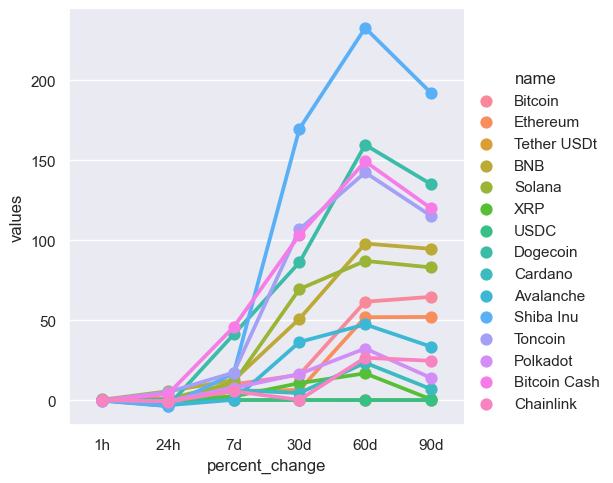

In [76]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [77]:
#I am gonna take 3 specific columns
#check for only bitcoin cash for the timestamp of whenever we ran it.

df10 = df72[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin Cash'")

df10['Timestamp'] = pd.to_datetime(df10['Timestamp'])
df10['Timestamp'] = df10['Timestamp'].dt.strftime('%Y-%m-%d %H:%M')
df10


name  quote.USD.price         Timestamp
13   Bitcoin Cash        573.02147  2024-03-28 18:56
28   Bitcoin Cash        573.13992  2024-03-28 18:57
43   Bitcoin Cash        572.84880  2024-03-28 18:58
58   Bitcoin Cash        571.40186  2024-03-28 18:59
73   Bitcoin Cash        571.32970  2024-03-28 19:00
88   Bitcoin Cash        571.31866  2024-03-28 19:01
103  Bitcoin Cash        571.03741  2024-03-28 19:02
118  Bitcoin Cash        571.04171  2024-03-28 19:03
133  Bitcoin Cash        599.23195  2024-03-29 13:43
148  Bitcoin Cash        599.15013  2024-03-29 13:44
163  Bitcoin Cash        599.14467  2024-03-29 13:45
178  Bitcoin Cash        599.16762  2024-03-29 13:46
193  Bitcoin Cash        599.15795  2024-03-29 13:47
208  Bitcoin Cash        599.20696  2024-03-29 13:48
223  Bitcoin Cash        599.18847  2024-03-29 13:49
238  Bitcoin Cash        599.19407  2024-03-29 13:50
253  Bitcoin Cash        599.29432  2024-03-29 13:51
268  Bitcoin Cash        599.36513  2024-03-29 13:53
283  Bitcoin Cash        600.23528  2024-03-29 13:54
298  Bitcoin Cash        600.30545  2024-03-29 13:55
313  Bitcoin Cash        600.33738  2024-03-29 13:56
328  Bitcoin Cash        600.26789  2024-03-29 13:57
343  Bitcoin Cash        600.26082  2024-03-29 13:58
358  Bitcoin Cash        600.25975  2024-03-29 13:59
373  Bitcoin Cash        600.06393  2024-03-29 14:00
388  Bitcoin Cash        600.07555  2024-03-29 14:01
403  Bitcoin Cash        600.18569  2024-03-29 14:02
418  Bitcoin Cash        600.49190  2024-03-29 14:03
433  Bitcoin Cash        600.31705  2024-03-29 14:04
448  Bitcoin Cash        600.26586  2024-03-29 14:05
463  Bitcoin Cash        599.91205  2024-03-29 14:06
478  Bitcoin Cash        600.02072  2024-03-29 14:07

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


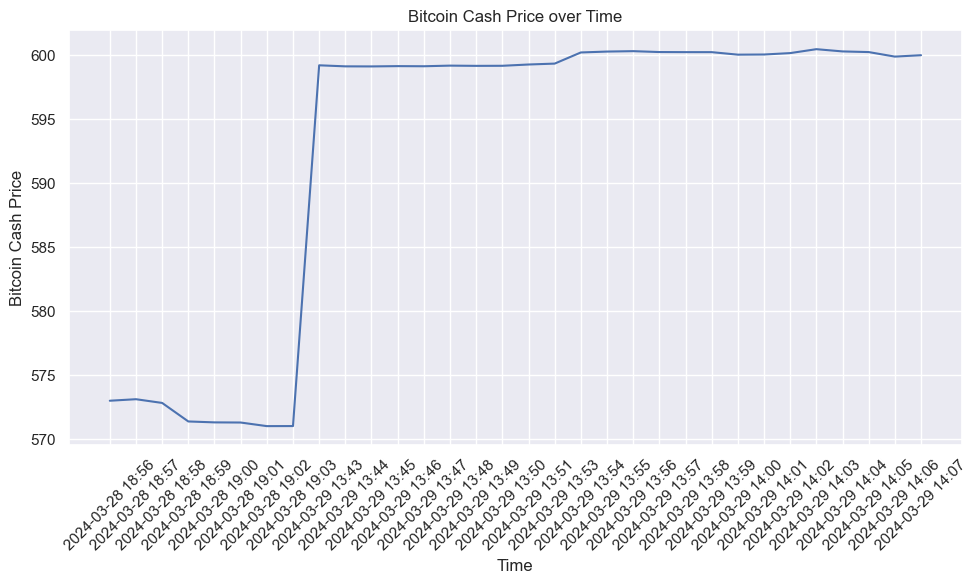

In [89]:
#as i ran the pulls in a loop, the time frame is in the same hour which makes sense why the plot looks like that 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df10, x='Timestamp', y='quote.USD.price')
plt.xlabel('Time')
plt.ylabel('Bitcoin Cash Price')
plt.title('Bitcoin Cash Price over Time')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Furthermore, we can examine the distribution of price changes (e.g., hourly, daily) for different cryptocurrencies. 
### I can also Analyze the circulating supply and total supply of cryptocurrencies. 
### This analysis can help assess factors such as inflation rate, scarcity, and potential impact on price.
### Analyze the historical price trends of different cryptocurrencies over time. 
### Plotting the price against the timestamp can reveal insights into the volatility and overall trend of each cryptocurrency.

In [92]:
# Group data by cryptocurrency symbol or name
crypto_grouped = df72.groupby(['symbol', 'name'])
crypto_grouped


In [96]:
# Calculate sum of circulating supply and total supply for each cryptocurrency
supply_summary = crypto_grouped[['circulating_supply', 'total_supply']].sum().reset_index()
supply_summary.dropna(subset=['circulating_supply', 'total_supply'], inplace=True)
supply_summary

symbol          name      circulating_supply            total_supply
0     ADA       Cardano     1138710839474.19995     1175770188112.44800
1    AVAX     Avalanche       12077329165.53251       13955397645.53251
2     BCH  Bitcoin Cash         629845300.00000         629845300.00000
3     BNB           BNB        4785160511.87484        4785160511.87484
4     BTC       Bitcoin         629361080.00000         629361080.00000
5    DOGE      Dogecoin     4597339564278.56934     4597339564278.56934
6     DOT      Polkadot       45677870095.99673       45677870095.99673
7     ETH      Ethereum        3842272344.25568        3842272344.25568
8    LINK     Chainlink       18787199054.48917       32000000000.00000
9    SHIB     Shiba Inu 18857261146006112.00000 18865090767719752.00000
10    SOL        Solana       14220966353.29901       18332849984.04015
11    TON       Toncoin      111050849168.62900      163352133021.16287
12   USDC          USDC     1038171060185.36304     1038171060185.36304
13   USDT   Tether USDt     3344138238399.06152     3449363684378.94141
14    XRP           XRP     1756295740096.00000     3199608395136.00000

In [98]:
supply_summary.sort_values(by='circulating_supply', ascending=False, inplace=True)
supply_summary

symbol          name      circulating_supply            total_supply
9    SHIB     Shiba Inu 18857261146006112.00000 18865090767719752.00000
5    DOGE      Dogecoin     4597339564278.56934     4597339564278.56934
13   USDT   Tether USDt     3344138238399.06152     3449363684378.94141
14    XRP           XRP     1756295740096.00000     3199608395136.00000
0     ADA       Cardano     1138710839474.19995     1175770188112.44800
12   USDC          USDC     1038171060185.36304     1038171060185.36304
11    TON       Toncoin      111050849168.62900      163352133021.16287
6     DOT      Polkadot       45677870095.99673       45677870095.99673
8    LINK     Chainlink       18787199054.48917       32000000000.00000
10    SOL        Solana       14220966353.29901       18332849984.04015
1    AVAX     Avalanche       12077329165.53251       13955397645.53251
3     BNB           BNB        4785160511.87484        4785160511.87484
7     ETH      Ethereum        3842272344.25568        3842272344.25568
2     BCH  Bitcoin Cash         629845300.00000         629845300.00000
4     BTC       Bitcoin         629361080.00000         629361080.00000

### Circulating Supply: 
#### This refers to the number of coins or tokens of a particular cryptocurrency that are currently available and circulating in the market. These are the tokens that have been mined, generated through staking or other means, and are actively traded or held by users.

### Total Supply: 
#### This represents the maximum number of coins or tokens that will ever be created for that cryptocurrency. It includes the circulating supply plus any additional tokens that may be released in the future through mining, staking rewards, or other mechanisms.

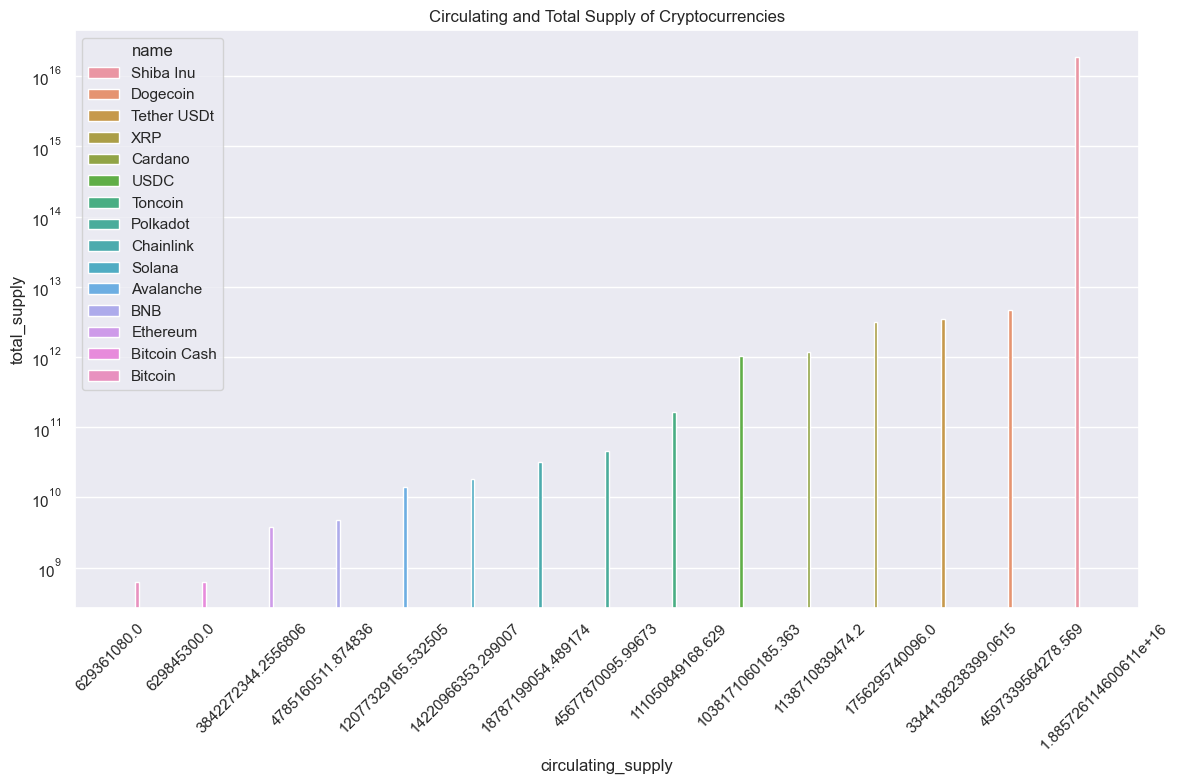

In [112]:
plt.figure(figsize=(12, 8))
sns.barplot(data=supply_summary, x='circulating_supply', y='total_supply', hue='name')
plt.xlabel('circulating_supply')
plt.ylabel('total_supply')
plt.title('Circulating and Total Supply of Cryptocurrencies')
plt.yscale('log') # Log scale for better visualization of large values
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
